# Assignment 5
### By: Mitchell Humphries

In [1]:
#General Import
import numpy as np
import matplotlib
import matplotlib.pylab as plt
import matplotlib.cm as cm
import math as m
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter

#For Animations
from matplotlib import animation, rc
from IPython.display import HTML

# 1. SOLVING SYSTEMS OF EQUATIONS

In [2]:
MAX_ITERATIONS = 100

# Initial guess is (0,0,0,0)
x = np.zeros(8)
step = 0

while step < MAX_ITERATIONS:
    x1 = x[0]
    x2 = x[1]
    x3 = x[2]
    x4 = x[3]
    x5 = x[4]
    x6 = x[5]
    x7 = x[6]
    x8 = x[7]
    
    initial_guess = [x1,x2,x3,x4,x5,x6,x7,x8]
    
    x1_new = ( 3 + x3 - x2 ) / 4
    x2_new = ( -x1 + 2*x3 - x4 + x5 - 6 ) / 6
    x3_new = ( x5 - x6 - x2 - 5 ) / 5
    x4_new = ( x5 + x7 + x8 - 2*x2) /5
    x5_new = ( 12 + x3 + x4 + x6 + x8 ) / 6
    x6_new = ( x3 + x5 - 12 ) / 5
    x7_new = ( x4 + x8 - 2 ) / 4
    x8_new = ( x4 + x5 + x7 + 2 ) / 5
    
    
    x_new = [x1_new,x2_new,x3_new,x4_new,x5_new,x6_new,x7_new,x8_new]
    
    #tolerance of 10^-5
    if np.allclose(initial_guess, x_new, atol=1e-5, rtol=0.):
        break
    
    step += 1
    x = x_new

print('Solution: ({:.0f}, {:.0f}, {:.0f}, {:.0f}, {:.0f}, {:.0f}, {:.0f}, {:.0f})'.format(x[0],x[1],x[2],x[3],x[4],x[5],x[6],x[7]))

Solution: (1, -1, -0, 1, 2, -2, -0, 1)


## Analysis:
These are the correct solutions. Thus the Jackbi method worked. 

# 2. ENERGY IN A CAPACITOR

In [3]:
maxIterations = 200
iteration = 0

#Set steo size
step = 0.1

# Set up arrays to hold x and y values
x = np.arange(-2,2+step,step)
y = x

# Make Empty 2x2 matrix
V = np.ones(shape=(len(y),len(x)))

# create OUTER boundary conditions
V[:,0]= 0 # left side of the box
V[:,-1]= 0 # right side of the box
V[0,:] = 0 # bottom of the box
V[-1,:] = 0 # top of the box

#Create INNER boudry conditions
xCenter = int(len(x)/2)
yCenter = int(len(y)/2)
stepsForCenter = int(0.5/step)

for i in np.arange(-1*stepsForCenter,stepsForCenter,1):
    for j in np.arange(-1*stepsForCenter,stepsForCenter,1):
        V[xCenter+i,yCenter + j] = 2 #Set center of box to 2

        
# # This is our initial guess for V
# print('Initial Guess: \nV=')
# print(V)
# print('\n\n')

Vog = V

# Now we need to compute the interior of this matrix
# DO NOT TOUCH THE BOUNDARY CONDITIONS!
while iteration < maxIterations:
    for i in np.arange(1,len(y)-1,1):
        for j in np.arange(1,len(x)-1,1):
            
            if (V[j,i] != 2 and V[j,i] != 0): #Dont change intital conditions
                Vnew = 0.25 * (V[j+1,i] + V[j-1,i] + V[j,i+1] + V[j,i-1])
                
                if np.allclose(V, Vnew, atol=1e-5, rtol=0.): #Is the approx done?
                    break
                    
                V[j][i] = Vnew
                
    iteration += 1

# #Print results
# print('Final Solution:\nV=')
# np.set_printoptions(formatter={'float': '{: 0.2f}'.format}) # Print results with nice formatting
# print(V)

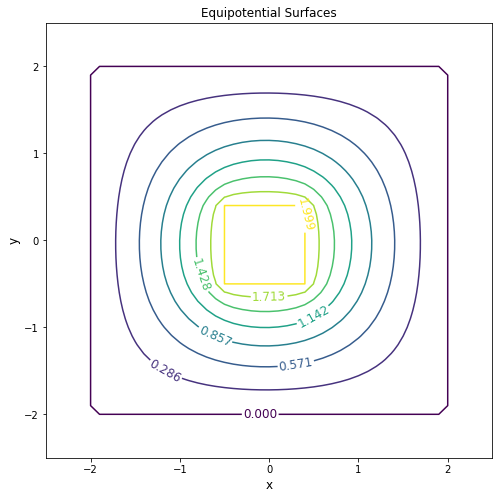

In [4]:
# Plot contour graph
plt.figure(figsize=(8,8))
CS = plt.contour(x, y, V, np.linspace(0,1.999,8))
plt.clabel(CS, inline=1, fontsize=12)
plt.axis([-2.5,2.5,-2.5,2.5])
plt.xlabel('x',fontsize=12)
plt.ylabel('y',fontsize=12)
plt.title('Equipotential Surfaces');

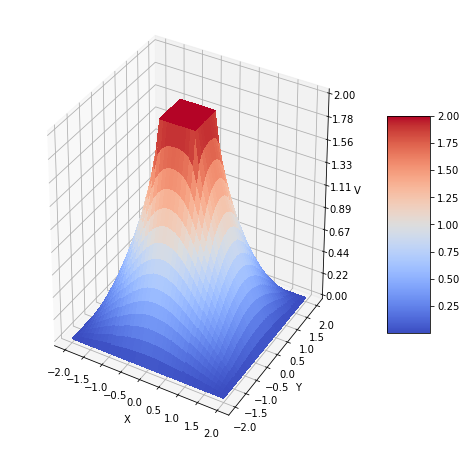

In [5]:
#Surface plot
Xmesh, Ymesh = np.meshgrid(x, y)
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(Xmesh, Ymesh, V, cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax.set_zlim(0,2)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('V')
plt.show()

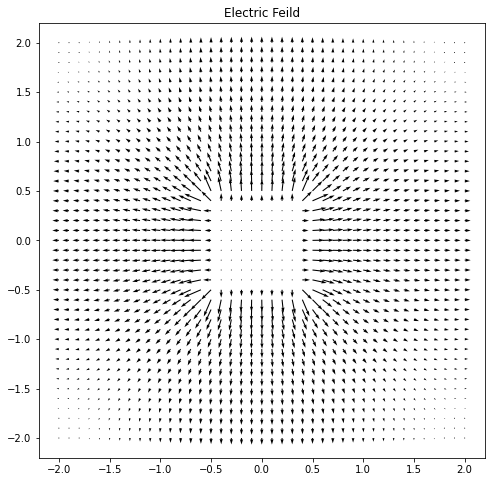

In [6]:
#Make potential
Umesh, Vmesh = np.gradient(V, .1, .1)
fig, ax = plt.subplots(figsize=(8,8))
q = ax.quiver(Xmesh,Ymesh,-Vmesh,-Umesh)
ax.set_title('Electric Feild')
plt.show()

## Analysis:
All plots were correctly reproduced. 

# 3. A WAVE ON A STRING

In [7]:
dx = 0.1 
dt = 0.05 
tmax = 35
xmax = 20
xInitial = 10
k=2
c=1.0 
r2=(c*dt/dx)**2

nx = int((xmax)/dx) + 1 #number of points on x 
nt = int((tmax)/dt) + 2 #number of points on t 
vArray = np.zeros((nt,nx)) #For any point vArray[time,Xposition] = Height

#Set Initial shape
def f(x): #Given equation
    ans = m.e**(-1*k*(x-xInitial)**2)
    return ans

for i in range(0,nx):
    vArray[0,i] = f(i*dx)
    vArray[1,i] = vArray[0,i]

#Run simulation
for t in range(1,nt-1): #Dont change first or last value
    for x in range(1,nx-1):
        vArray[t+1,x] = 2*(1-r2)*vArray[t,x]-vArray[t-1,x]+r2*(vArray[t,x-1]+vArray[t,x+1])

        
#Make Animation
fig, ax = plt.subplots()

ax.set_xlim(( 0, 20))
ax.set_ylim((-1, 1))

line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    x = np.arange(0,xmax + 1*dx,dx)
    y = vArray[i,:]
    line.set_data(x, y)
    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(vArray), interval=10, blit=True)

display(HTML(anim.to_html5_video()))
plt.close()

## Analysis:
All seen the simulation does work. The waves are inverted and reflected at the bopundry conditions. 

# 4. TESTING THE LIMITS YOUR SIMULATION

## Analysis
Personal Matter, Didnt get to finish this one. 

# 5. RIPPLES IN A POND (SIMULATING THE MOTION OF A 2D WAVE)

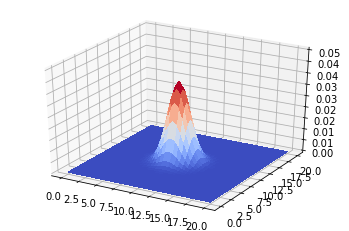

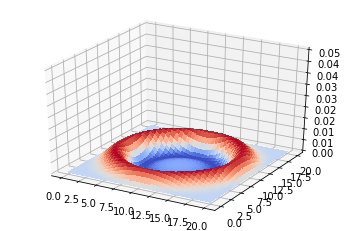

In [8]:
dr = 0.5
L = 20
dt = 0.07
tmax = 30
c = 3.5
sig = 2;
k = 1 / (2 * np.pi * sig**2)
x0 = 10;
y0 = 10;
a=(c * dt/dr)**2

#Make Arrays
xrange = np.arange(0,L+dr,dr)
yrange = np.arange(0,L+dr,dr)
trange = np.arange(0,tmax+dt,dt)

fig = plt.figure()
X,Y = np.meshgrid(xrange,yrange)

#Set initial conditions
z0 = (1/(np.pi*8))*np.exp((-1/4)*((X-x0)**2 +(Y-y0)**2))

# Get length of arrays
nx = len(xrange)
ny = len(yrange)
nt = len(trange)

# Make 3D solition array
u = np.zeros((nt,nx,ny))

# Initial condition on the wave = pulse profile from above
u[0,:,:] = z0
u[1,:,:] = z0
u[2,:,:] = z0


#Run loops
for n in range(1,nt-1): #Loop time
    for i in range(1,nx-1): #loop X locaiton
        for j in range(1, ny-1): #loop Y location
            u[n+1,i,j] = 2*(1-2*a)*u[n,i,j] - u[n-1,i,j] + (a)*(u[n,i-1,j] + u[n,i+1,j] + u[n,i,j-1] + u[n,i,j+1])
                

#Make plot of intial
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y,u[0,:,:],cmap=cm.coolwarm, antialiased=False)
ax.set_zlim(0, .05)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
plt.show()


#make 2nd plot later
fig = plt.figure()
X,Y = np.meshgrid(xrange,yrange)
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, u[30,:,:],cmap=cm.coolwarm,linewidth=0,  antialiased=False)
ax.set_zlim(0, 0.05)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
plt.show()

## Analysis
The code does run without issues. It does seem to produce the expected graphs. 